<a href="https://www.kaggle.com/code/miguelcontrerasortiz/01-primera-red?scriptVersionId=124626592" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from tqdm.keras import TqdmCallback
import numpy as np
import matplotlib.pyplot as plt

# Creación del dataset de Fashion MNIST

In [2]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


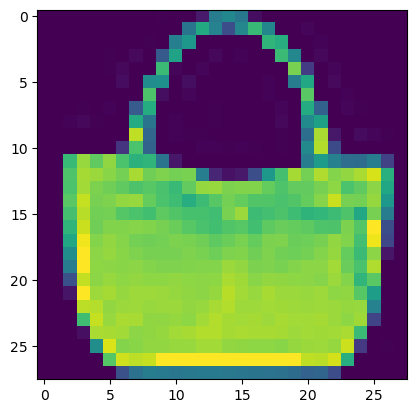

In [3]:
plt.imshow(train_images[100])

# Limpieza de datos

In [4]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Red Neuronal

In [5]:
from warnings import filters
model = tf.keras.Sequential()
#Capas de nuestra red
model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

#Esta capa "Aplana" los tensores con los que estamos trabajando para que queden en serie
model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

# Compilando la red

In [6]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

# Entrenando la red

In [7]:
model.fit(train_images,
          train_labels,
          batch_size = 64,
          epochs = 10,
          callbacks = [TqdmCallback(verbose = 1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/10
938/938 [==============================] - 52s 54ms/step - loss: 0.5849 - accuracy: 0.7882
Epoch 2/10
938/938 [==============================] - 50s 53ms/step - loss: 0.4007 - accuracy: 0.8548
Epoch 3/10
938/938 [==============================] - 50s 53ms/step - loss: 0.3566 - accuracy: 0.8701
Epoch 4/10
938/938 [==============================] - 50s 53ms/step - loss: 0.3347 - accuracy: 0.8792
Epoch 5/10
938/938 [==============================] - 50s 54ms/step - loss: 0.3203 - accuracy: 0.8839
Epoch 6/10
938/938 [==============================] - 50s 53ms/step - loss: 0.3108 - accuracy: 0.8877
Epoch 7/10
938/938 [==============================] - 51s 54ms/step - loss: 0.3018 - accuracy: 0.8924
Epoch 8/10
938/938 [==============================] - 51s 54ms/step - loss: 0.2977 - accuracy: 0.8941
Epoch 9/10
938/938 [==============================] - 50s 53ms/step - loss: 0.2979 - accuracy: 0.8949
Epoch 10/10
938/938 [==============================] - 50s 54ms/step - loss: 0.293

# Análisis de resultados

In [8]:
score = model.evaluate(test_images, test_labels, verbose = 0)

In [9]:
score

[0.25998926162719727, 0.90829998254776]

# Callbacks

In [10]:
# Si una metrica que no mejore, se acaba el entrenamiento, el limite se coloca en patience
early = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=1)
model.fit(train_images,
         train_labels,
         batch_size=64,
        callbacks=[early],
         epochs=10)

Epoch 1/10
938/938 [==============================] - 49s 52ms/step - loss: 0.2915 - accuracy: 0.8978
Epoch 2/10
938/938 [==============================] - 49s 52ms/step - loss: 0.2873 - accuracy: 0.8987
Epoch 3/10
938/938 [==============================] - 49s 52ms/step - loss: 0.2873 - accuracy: 0.8975


In [11]:
# Checkpoint, otro callback muy usado
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='mi_primer_red_conv.hdf5',
                                verbose=1,
                                  monitor='accuracy',
                                  save_best_only=True)
model.fit(train_images,
         train_labels,
         batch_size=64,
         callbacks=[checkpoint],
         epochs=10)

Epoch 1/10
938/938 [==============================] - ETA: 0s - loss: 0.2830 - accuracy: 0.9002
Epoch 1: accuracy improved from -inf to 0.90018, saving model to mi_primer_red_conv.hdf5
938/938 [==============================] - 48s 51ms/step - loss: 0.2830 - accuracy: 0.9002
Epoch 2/10
937/938 [============================>.] - ETA: 0s - loss: 0.2866 - accuracy: 0.8986
Epoch 2: accuracy did not improve from 0.90018
938/938 [==============================] - 48s 52ms/step - loss: 0.2865 - accuracy: 0.8986
Epoch 3/10
938/938 [==============================] - ETA: 0s - loss: 0.2821 - accuracy: 0.9012
Epoch 3: accuracy improved from 0.90018 to 0.90117, saving model to mi_primer_red_conv.hdf5
938/938 [==============================] - 48s 51ms/step - loss: 0.2821 - accuracy: 0.9012
Epoch 4/10
937/938 [============================>.] - ETA: 0s - loss: 0.2826 - accuracy: 0.9008
Epoch 4: accuracy did not improve from 0.90117
938/938 [==============================] - 49s 52ms/step - loss: 0.2

In [12]:
model2 = model
model2.load_weights('./mi_primer_red_conv.hdf5')

In [13]:
# Usando el mejor modelo
model2.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 8ms/step - loss: 0.2925 - accuracy: 0.9067


[0.2924741804599762, 0.9067000150680542]